In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('US Police shootings in from 2015-22.csv')

In [4]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [5]:
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,6,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,7,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,8,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,9,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,10,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


In [6]:
df.count()

id                         7729
name                       7312
date                       7729
manner_of_death            7729
armed                      7520
age                        7247
gender                     7709
race                       6269
city                       7729
state                      7729
signs_of_mental_illness    7729
threat_level               7729
flee                       6854
body_camera                7729
longitude                  6892
latitude                   6892
is_geocoding_exact         7729
dtype: int64

In [7]:
#Checking the number of null values for each attribute
df.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

In [8]:
#Since the names cannot be null and we just can't give some random values for unknown names, so I'll just assign John Doe name
df['name'] = df['name'].fillna('John Doe')

In [9]:
#Checking the count of names with null values post processesing
df['name'].isnull().sum()

0

In [10]:
#Number of unique arms reported in the incidents
df['armed'].nunique()

104

In [11]:
#Number of races of the targeted victims reported
df['race'].nunique()

6

In [12]:
df['race'].fillna('Other', inplace=True)

In [14]:
df['race'].describe()

count     7729
unique       7
top          W
freq      3198
Name: race, dtype: object

In [15]:
df['city'].mode()

0    Los Angeles
Name: city, dtype: object

In [16]:
df['city'].value_counts()

city
Los Angeles         128
Phoenix             101
Houston              87
San Antonio          66
Las Vegas            63
                   ... 
Valdez                1
Pinetop-Lakeside      1
Duarte                1
Perryopolis           1
Strongs Prairie       1
Name: count, Length: 3148, dtype: int64

In [17]:
#Unique states in which the incidents are reported
df['state'].nunique()

51

In [18]:
state_count_info = df['state'].value_counts()
state_count_list = [list(info) for info in zip(state_count_info.values, state_count_info.index)]
print(state_count_list)

[[1114, 'CA'], [694, 'TX'], [494, 'FL'], [351, 'AZ'], [291, 'GA'], [279, 'CO'], [222, 'OH'], [221, 'NC'], [212, 'WA'], [211, 'OK'], [209, 'TN'], [200, 'MO'], [166, 'NM'], [160, 'PA'], [157, 'IL'], [155, 'LA'], [146, 'AL'], [141, 'KY'], [140, 'IN'], [139, 'NY'], [137, 'VA'], [130, 'MI'], [125, 'OR'], [124, 'NV'], [124, 'SC'], [117, 'WI'], [109, 'AR'], [107, 'MD'], [98, 'MS'], [88, 'UT'], [88, 'NJ'], [86, 'MN'], [73, 'WV'], [71, 'KS'], [62, 'ID'], [54, 'MA'], [53, 'AK'], [49, 'MT'], [48, 'IA'], [39, 'NE'], [37, 'HI'], [33, 'ME'], [27, 'SD'], [26, 'WY'], [24, 'DC'], [22, 'CT'], [22, 'NH'], [18, 'ND'], [17, 'DE'], [13, 'VT'], [6, 'RI']]


In [19]:
state_count_list.sort(reverse=True)

In [20]:
print(state_count_list)

[[1114, 'CA'], [694, 'TX'], [494, 'FL'], [351, 'AZ'], [291, 'GA'], [279, 'CO'], [222, 'OH'], [221, 'NC'], [212, 'WA'], [211, 'OK'], [209, 'TN'], [200, 'MO'], [166, 'NM'], [160, 'PA'], [157, 'IL'], [155, 'LA'], [146, 'AL'], [141, 'KY'], [140, 'IN'], [139, 'NY'], [137, 'VA'], [130, 'MI'], [125, 'OR'], [124, 'SC'], [124, 'NV'], [117, 'WI'], [109, 'AR'], [107, 'MD'], [98, 'MS'], [88, 'UT'], [88, 'NJ'], [86, 'MN'], [73, 'WV'], [71, 'KS'], [62, 'ID'], [54, 'MA'], [53, 'AK'], [49, 'MT'], [48, 'IA'], [39, 'NE'], [37, 'HI'], [33, 'ME'], [27, 'SD'], [26, 'WY'], [24, 'DC'], [22, 'NH'], [22, 'CT'], [18, 'ND'], [17, 'DE'], [13, 'VT'], [6, 'RI']]


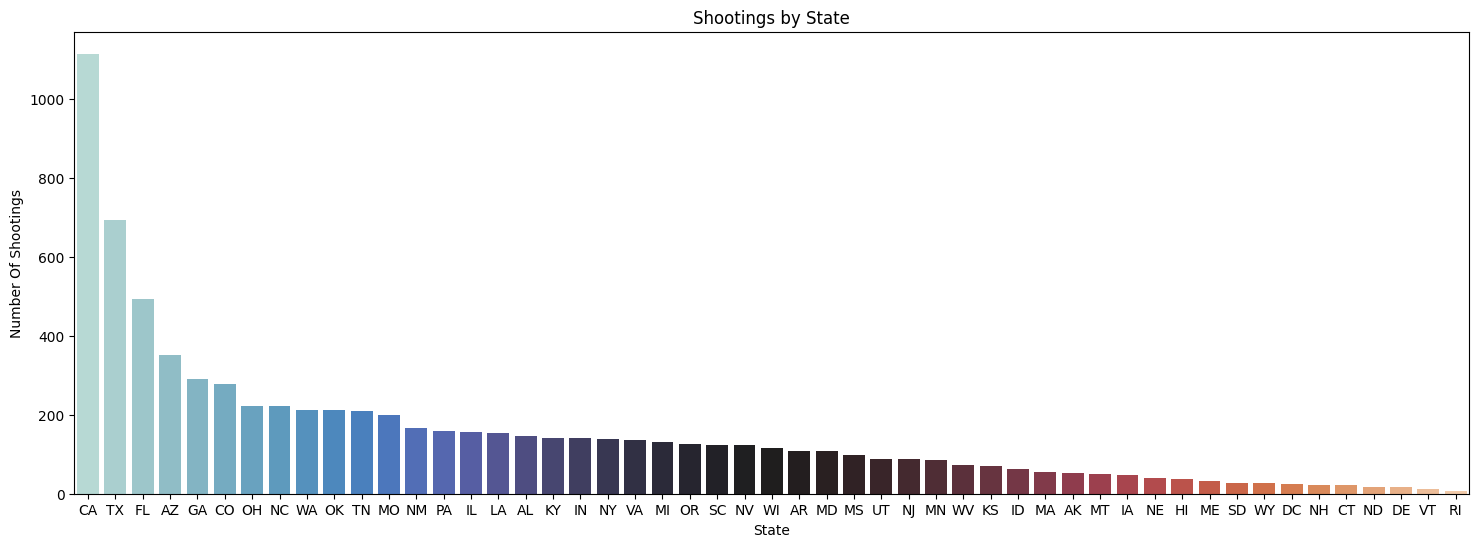

In [21]:
# a plot for states vs number of incidents is plotted here
import seaborn as sns
import matplotlib.pyplot as plt

x = [i[1] for i in state_count_list]
y = [i[0] for i in state_count_list]

plt.figure(figsize=(18,6))
sns.barplot(x=x,y=y,hue = x,palette='icefire', legend=False)
plt.xlabel(xlabel = 'State')
plt.ylabel(ylabel = 'Number Of Shootings')
plt.title(label = 'Shootings by State')
plt.show()

The above graph depicts that the incidents in California are highest, follwed by Texas